In [1]:
# Practical 4: Logistic Regression on Breast Cancer Dataset, demonstrating effect of overfitting and regularization

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
import math

In [2]:
def sigmoid(z):
    z = np.array(z)
    g = 1/(1+(math.e)**-z)

    return g

def compute_cost(X, y, w, b, *argv):

    m, n = X.shape
    cost = 0
    for i in range(m):
        z_i = np.dot(X[i], w) + b
        f_wb_i = sigmoid(z_i)
        # Add epsilon to avoid log(0) or log(1)
        cost += -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
    total_cost = cost/m


    return total_cost

def compute_gradient(X, y, w, b, *argv):
    
    m, n = X.shape
    dj_dw = np.zeros(n)
    dj_db = 0.
    
    for i in range(m):
        z_wb = np.dot(X[i], w) + b
        f_wb = sigmoid(z_wb)

        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i

        for j in range(n):
            dj_dw[j] += (f_wb - y[i]) * X[i, j]

    dj_dw = dj_dw / m
    dj_db = dj_db / m


    return dj_db, dj_dw
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_):

    # number of training examples
    m = len(X)

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw
        b_in = b_in - alpha * dj_db

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")

    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

def predict(X, w, b):

    # number of training examples
    m, n = X.shape
    p = np.zeros(m)

    ### START CODE HERE ###
    # Loop over each example
    for i in range(m):
        z_wb = 0
        # Loop over each feature
        for j in range(n):
            # Add the corresponding term to z_wb
            z_wb += X[i, j] * w[j]


        # Add bias term
        z_wb += b

        # Calculate the prediction for this example
        f_wb = sigmoid(z_wb)

        # Apply the threshold
        p[i] = 1 if f_wb>0.5 else 0

    ### END CODE HERE ###
    return p

def compute_cost_l2(X, y, w, b, lambda_ = 1):
   
    m, n = X.shape

    # Calls the compute_cost function that you implemented above
    cost_without_reg = compute_cost(X, y, w, b)

    # You need to calculate this value
    reg_cost = 0.

    for j in range(n):
      reg_cost_j = w[j]**2
      reg_cost = reg_cost + reg_cost_j
    reg_cost = (lambda_/(2*m)) * reg_cost


    # Add the regularization cost to get the total cost
    total_cost = cost_without_reg + reg_cost

    return total_cost

def compute_cost_l1(X, y, w, b, lambda_=1):
    m, n = X.shape
    cost_without_reg = compute_cost(X, y, w, b)
    
    # L1 regularization term (sum of absolute values)
    reg_cost = (lambda_ / (2 * m)) * np.sum(np.abs(w))
    
    total_cost = cost_without_reg + reg_cost
    return total_cost


def compute_gradient_l2(X, y, w, b, lambda_ = 1):
  
    m, n = X.shape

    dj_db, dj_dw = compute_gradient(X, y, w, b)
    for j in range(n):
        dj_dw[j] = dj_dw[j] + (lambda_/m) * w[j]
    return dj_db, dj_dw

def compute_gradient_l1(X, y, w, b, lambda_=1):
    dj_db, dj_dw = compute_gradient(X, y, w, b)
    m = len(y)
    for j in range(len(w)):
        dj_dw[j] += (lambda_/m) * np.sign(w[j])  # L1 uses sign(w)
    return dj_db, dj_dw


In [9]:
# Generating synthetic binary classification data
X, y = make_classification(n_samples=500, n_features=2, n_informative=2 , n_redundant=0, n_clusters_per_class=1,random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))

# Initializing fitting parameters
w_init = np.zeros(X_train.shape[1])
b_init = 0.

The shape of X_train is: (400, 2)
The shape of y_train is: (400,)
We have m = 400 training examples


In [19]:
# No regularization
w, b, J_hist, _ = gradient_descent(X_train, y_train, w_init, b_init,compute_cost, compute_gradient,alpha=0.1, num_iters=1000, lambda_=0)


print("Train accuracy (No reg):", accuracy_score(y_train, predict(X_train, w, b)))
print("Test accuracy (No reg):", accuracy_score(y_test, predict(X_test, w, b)))


Iteration    0: Cost     0.67   
Iteration  100: Cost     0.35   
Iteration  200: Cost     0.33   
Iteration  300: Cost     0.33   
Iteration  400: Cost     0.33   
Iteration  500: Cost     0.32   
Iteration  600: Cost     0.32   
Iteration  700: Cost     0.32   
Iteration  800: Cost     0.32   
Iteration  900: Cost     0.32   
Iteration  999: Cost     0.32   
Train accuracy (No reg): 0.8725
Test accuracy (No reg): 0.88


In [22]:
# L2 regularization
w_l2, b_l2, J_hist_l2, _ = gradient_descent(X_train, y_train, w_init, b_init, compute_cost_l2, compute_gradient_l2,alpha=0.1, num_iters=1000, lambda_=10)

print("Train accuracy (L2):", accuracy_score(y_train, predict(X_train, w_l2, b_l2)))
print("Test accuracy (L2):", accuracy_score(y_test, predict(X_test, w_l2, b_l2)))


Iteration    0: Cost     0.67   
Iteration  100: Cost     0.39   
Iteration  200: Cost     0.38   
Iteration  300: Cost     0.38   
Iteration  400: Cost     0.38   
Iteration  500: Cost     0.38   
Iteration  600: Cost     0.38   
Iteration  700: Cost     0.38   
Iteration  800: Cost     0.38   
Iteration  900: Cost     0.38   
Iteration  999: Cost     0.38   
Train accuracy (L2): 0.8675
Test accuracy (L2): 0.88


In [23]:
# L1 regularization
w_l1, b_l1, J_hist_l1, _ = gradient_descent(X_train, y_train, w_init, b_init,compute_cost_l1, compute_gradient_l1,alpha=0.1, num_iters=1000, lambda_=10)

print("Train accuracy (L1):",accuracy_score(y_train, predict(X_train, w_l1, b_l1)))
print("Test accuracy (L1):", accuracy_score(y_test, predict(X_test, w_l1, b_l1)))



Iteration    0: Cost     0.67   
Iteration  100: Cost     0.38   
Iteration  200: Cost     0.37   
Iteration  300: Cost     0.36   
Iteration  400: Cost     0.36   
Iteration  500: Cost     0.36   
Iteration  600: Cost     0.36   
Iteration  700: Cost     0.36   
Iteration  800: Cost     0.36   
Iteration  900: Cost     0.36   
Iteration  999: Cost     0.36   
Train accuracy (L1): 0.875
Test accuracy (L1): 0.89


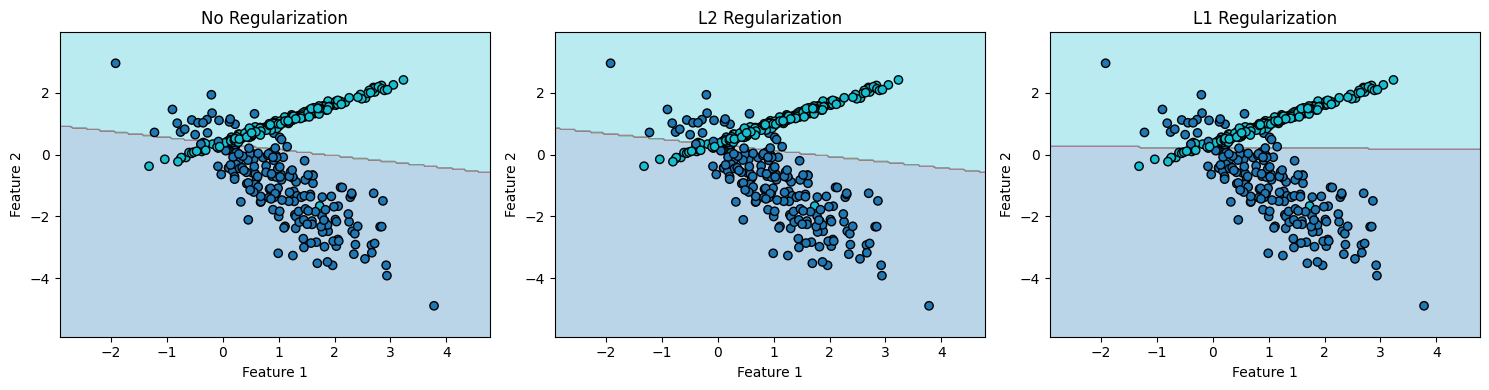

In [28]:

def plot_decision_boundary(X, y, w, b, title):
    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),np.linspace(y_min, y_max, 200))


    # Predict over the grid
    Z = predict(np.c_[xx.ravel(), yy.ravel()], w, b)
    Z = Z.reshape(xx.shape)
 
    # Plot contour
    plt.contourf(xx, yy, Z, alpha=0.3, cmap="tab10")
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="tab10", edgecolors='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

# Plot all three side by side
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plot_decision_boundary(X_train, y_train, w, b, "No Regularization")

plt.subplot(1, 3, 2)
plot_decision_boundary(X_train, y_train, w_l2, b_l2, "L2 Regularization")

plt.subplot(1, 3, 3)
plot_decision_boundary(X_train, y_train, w_l1, b_l1, "L1 Regularization")

plt.tight_layout()
plt.show()
